### 1. 산점도 그래프

   (1) matplotlib의 subplots()로 기본 틀 만들고 seaborn의 그래프 함수 이용
    
    회귀선 제거 : fit_reg=False
     axes = sb.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
     
     [예] 지불 금액과 팁에 대한 그래프
     
     
   (2) 산점도와 히스토그램을 한번에 - jointplot()
  
      ` 산점도 그래프의 데이타를 육각(hexbin)으로 구분 : kind='hex'속성
          ( 개수가 많아지면 진한 색으로 표시 )
          axes = sb.jointplot(x='total_bill', y='tip', data=tips, kind='hex')



###  2. 이차원 밀집도 그래프 (등고선그래프) - kdeplot()


###  3. 막대그래프 - barplot()
 
     * 이산형 데이타(명목데이타)
     
     [예] 시간대에 따라 지불한 비용의 평균 그래프
     

###  4. 박스그래프 - boxplot() 
     : 최소값, 4분위수, 평균값, 이상치 등의 통계량을 한번에 표현하는 그래프
     
     - 1분위수와 3분위수를 박스로 그려짐
     - 박스 내부의 선은 중앙값이다 (평균값이 아님)
     - 박수 외부의 선은 최솟값과 최댓값인데
         ` 최솟값 : 1분위수 - ( IQR * 1.5 )
         ` 최댓값 : 3분위수 + ( IQR * 1.5 )
         ` IQR = 3분위수 - 1분위수
     - 선 밖의 점은 outlier로 결측치이다
     
     
###  5. 바이올린 그래프 - violinplot()
     : 박스 그래스는 통계 수치를 확인하기 위해 자주 사용되지만 데이터 분산이 모호하기에 
       박스 그래스에 커널 밀도를 표현한 그래프     
       
       
###  6. 관계 그래프 - pairplot()
 
    [그래프 분석]
    1. 데이타셋에서 연속형 데이타로 된 컬럼
    2. 동일 컬럼인경우 즉 하나의 변수이기에 히스토그램으로 나옴
    3. 다른 변수와의 결합은 이차원 그래프로 산점도 그래프로 나옴
    4. 대각선으로는 동일한 결과        

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


## 1. 산점도 그래프

### (1) matplotlib의 subplots()로 기본 틀 만들고 seaborn의 그래프 함수 이용
    
    회귀선 제거 : fit_reg=False
     axes = sb.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
     
     [예] 지불 금액과 팁에 대한 그래프

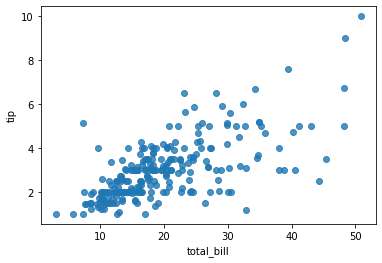

In [7]:
# plt.subplots()
# axes = sns.regplot(x=tips['total_bill'], y = tips['tip']);
axes = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)

###    (2) 산점도와 히스토그램을 한번에 - jointplot()
  
      ` 산점도 그래프의 데이타를 육각(hexbin)으로 구분 : kind='hex'속성
          ( 개수가 많아지면 진한 색으로 표시 )
          axes = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

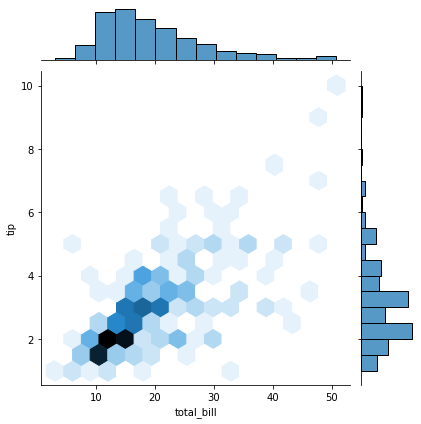

In [9]:
axes = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')


##  2. 이차원 밀집도 그래프 (등고선그래프) - kdeplot()

    [참고] 함수의 도움말 : 함수에 커서 놓고 ctrl + tab

Text(0.5, 0, 'BILL')

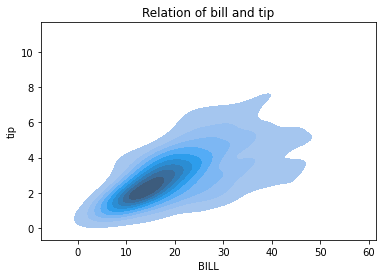

In [14]:
axes = sns.kdeplot(x='total_bill', y='tip', data=tips, shade='True');
axes.set_title('Relation of bill and tip')
axes.set_xlabel('BILL')

##  3. 막대그래프 - barplot()
 
     * 이산형 데이타(명목데이타)
     
     [예] 시간대에 따란 비불한 비용의 평균 그래프
         시간대 : Lunch, Dinner ( 명목형 데이터 )
         
        - countplot()
        - barplot()

C:\Users\kosmo_04\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='count'>

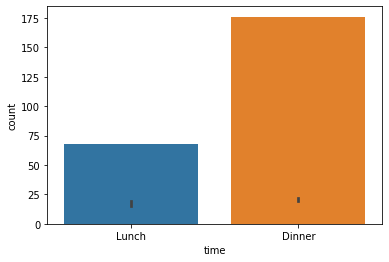

In [20]:
sns.barplot(x='time', y='total_bill', data=tips);
sns.countplot(tips['time'])

##  4. 박스그래프 - boxplot() 
     : 최소값, 4분위수, 평균값, 이상치 등의 통계량을 한번에 표현하는 그래프
     
     - 1분위수와 3분위수를 박스로 그려짐
     - 박스 내부의 선은 중앙값이다 (평균값이 아님)
     - 박수 외부의 선은 최솟값과 최댓값인데
         ` 최솟값 : 1분위수 - ( IQR * 1.5 )
         ` 최댓값 : 3분위수 + ( IQR * 1.5 )
         ` IQR = 3분위수 - 1분위수
     - 선 밖의 점은 outlier로 결측치이다

<img src="https://i.imgur.com/CnFsXL9.png" width=450>

<AxesSubplot:xlabel='day', ylabel='total_bill'>

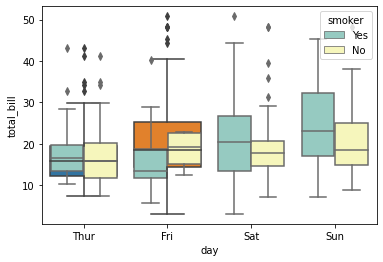

In [30]:
# 시간대별 지불금액을 boxplot
sns.boxplot(x='time',y='total_bill', data=tips)
sns.boxplot(x='day',y='total_bill', data=tips, hue='smoker',palette='Set3')


##  5. 바이올린 그래프 - violinplot()
     : 박스 그래스는 통계 수치를 확인하기 위해 자주 사용되지만 데이터 분산이 모호하기에 
       박스 그래스에 커널 밀도를 표현한 그래프

<AxesSubplot:xlabel='time', ylabel='total_bill'>

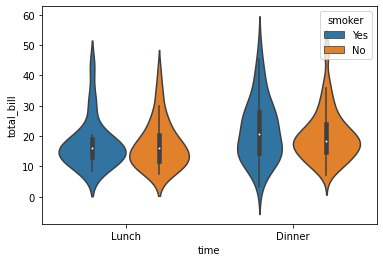

In [32]:
sns.violinplot(x='time',y='total_bill', data=tips, hue='smoker')



##  6. 관계 그래프 - pairplot()
 
    [그래프 분석]
    1. 데이타셋에서 연속형 데이타로 된 컬럼
    2. 동일 컬럼인경우 즉 하나의 변수이기에 히스토그램으로 나옴
    3. 다른 변수와의 결합은 이차원 그래프로 산점도 그래프로 나옴
    4. 대각선으로는 동일한 결과    

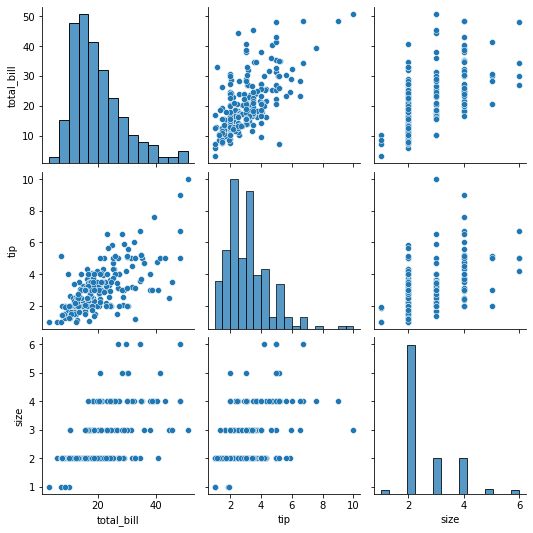

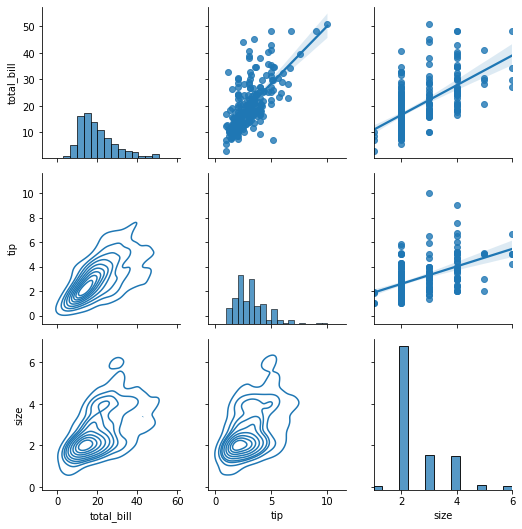

In [36]:
axes = sns.pairplot(tips)

pair = sns.PairGrid(tips)
pair.map_upper(sns.regplot) # 대각선 이로는 산점도 그래프
pair.map_lower(sns.kdeplot) # 대각선 밑으로는 밀집도 그래프
pair.map_diag(sns.histplot) # 대각선은 히스토그램